In [1]:
import pandas as pd
import numpy as np

# Load datasets
train_df = pd.read_csv('D:\\ExcelR Assignments\\Assignment 7\\Titanic_train.csv')
test_df = pd.read_csv('D:\\ExcelR Assignments\\Assignment 7\\Titanic_test.csv')

In [3]:
# Data exploration
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

Text(0.5, 1.0, 'Survival Count')

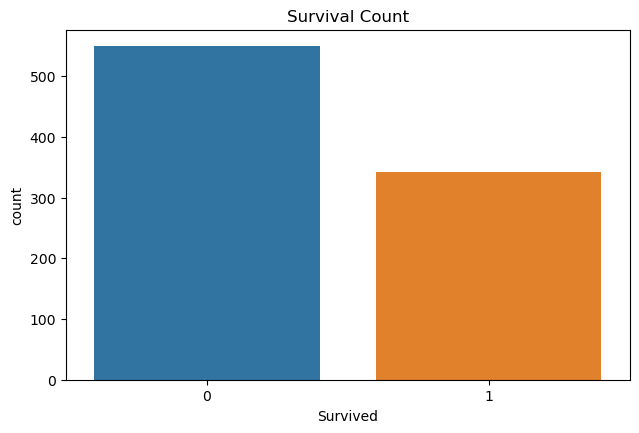

In [5]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')

Text(0.5, 1.0, 'Survival by Pclass')

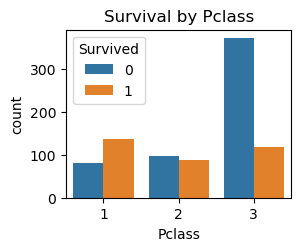

In [7]:
plt.subplot(2, 2, 2)
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')

Text(0.5, 1.0, 'Age Distribution by Survival')

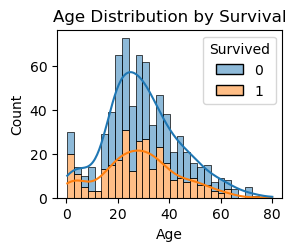

In [9]:
plt.subplot(2, 2, 3)
sns.histplot(data=train_df, x='Age', bins=30, kde=True, hue='Survived', multiple="stack")
plt.title('Age Distribution by Survival')

Text(0.5, 1.0, 'Fare Distribution by Survival')

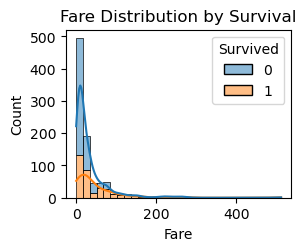

In [11]:
plt.subplot(2, 2, 4)
sns.histplot(data=train_df, x='Fare', bins=30, kde=True, hue='Survived', multiple="stack")
plt.title('Fare Distribution by Survival')

In [17]:
# Data Preprocessing
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [19]:
# Encode categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [21]:
# Feature selection
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']]
y = train_df['Survived']

In [23]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1 Score: 0.7777777777777778
ROC AUC Score: 0.8117117117117117


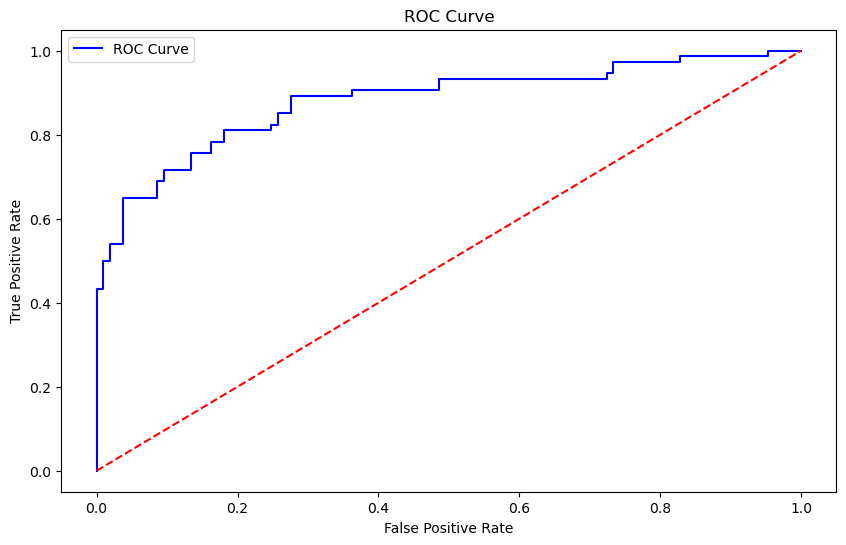

In [31]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
# Coefficients and feature names
coefficients = model.coef_[0]
features = X.columns

# Display feature importance
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")

Pclass: -0.6019
Sex: -1.2843
Age: -0.4013
SibSp: -0.3472
Parch: -0.1071
Fare: 0.0919
Embarked: -0.1699
Cabin: 0.2803


In [ ]:
'''
Interpretation:
Positive Coefficient: Increases the log odds of survival. 
Negative Coefficient: Decreases the log odds of survival. 

Significance of Features in Predicting Survival Probability:

Pclass (Negative Impact)
        Lower classes (3rd) have lower survival rates due to limited access to lifeboats and resources.

Sex (Strong Positive for Female)
        Females have a higher survival rate due to the "women and children first" policy.

Age (Mixed Impact)
        Younger passengers, especially children, had higher survival rates. Older passengers might have lower survival chances.

SibSp and Parch (Complex Relationship)
        Having a small family group can increase survival due to mutual support, but larger groups may face difficulty evacuating.

Fare (Positive Impact)
        Passengers who paid higher fares were often in first class, increasing their survival chances.

Embarked (Varied by Port)
        Port of embarkation may show trends linked to socioeconomic status or lifeboat access.

Cabin (Positive Impact)
        Having a cabin (not missing) may indicate a higher social class and thus a better survival chance.
'''

Streamlit Deployment:

In [ ]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model and scaler
model = pickle.load(open('titanic_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

st.title("Titanic Survival Prediction")

# User inputs
Pclass = st.selectbox("Pclass", [1, 2, 3])
Sex = st.selectbox("Sex", ['male', 'female'])
Age = st.slider("Age", 0, 80, 25)
SibSp = st.slider("SibSp (Siblings/Spouses Aboard)", 0, 8, 0)
Parch = st.slider("Parch (Parents/Children Aboard)", 0, 6, 0)
Fare = st.number_input("Fare", min_value=0.0, max_value=520.0, value=30.0)
Embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])
Cabin = st.selectbox("Cabin Info Available", [0, 1])

# Convert categorical inputs
Sex = 1 if Sex == 'male' else 0
Embarked = {'C': 0, 'Q': 1, 'S': 2}[Embarked]

# Predict button
if st.button("Predict"):
    # Prepare input data
    input_data = pd.DataFrame([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Cabin]],
                              columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin'])
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    
    # Display result
    if prediction[0] == 1:
        st.success("This passenger would have survived!")
    else:
        st.error("This passenger would not have survived.")


Interview Questions:

In [ ]:
'''
1.What is the difference between precision and recall?

Precision and recall are metrics used to evaluate classification models, especially in imbalanced datasets:
Precision: measures the accuracy of positive predictions. It is the ratio of true positives (correctly predicted positives)
           to all predicted positives (true positives + false positives). 
           High precision indicates fewer false positives.
Recall (or sensitivity): measures the model's ability to identify actual positives. 
                         It is the ratio of true positives to all actual positives (true positives + false negatives). 
                         High recall indicates fewer false negatives.
In summary, precision focuses on the quality of positive predictions, while recall emphasizes capturing all actual positives. 
A balance between them is often sought using the F1 score.

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets (folds). 
The model is trained on some folds and tested on the remaining ones, rotating this process across all folds.

In binary classification, cross-validation is crucial because it ensures the model generalizes well to unseen data, 
reducing the risk of overfitting or underfitting. 
It provides a more robust estimate of model performance compared to a single train-test split, 
especially in datasets with limited size. Techniques like k-fold cross-validation improve reliability by averaging performance metrics across folds.
'''